In [1]:
import numpy as np
from scipy.optimize import minimize, rosen, rosen_der
from matplotlib import pyplot as plt
import numpy as np
import math
import pdb

%matplotlib inline 
# Allow matplotlib to run in a notebook

def create_total_function(functions, alpha = 0.1):
    """
    See notes that I emailed Dr. Kavanagh
    """
    optimiztion_func = lambda xs : \
                     np.amax([np.amin([f(x) for x in xs]) for f in functions]) \
                     + alpha * np.sum([np.amin([f(x) for x in xs]) for f in functions])
    return optimiztion_func


def create_worst_case_function(functions):
    """
    See notes that I emailed Dr. Kavanagh
    """
    optimiztion_func = lambda xs : \
                     np.amax([np.amin([f(x) for x in xs]) for f in functions])
    return optimiztion_func

In [2]:
""" Define constants 
"""
BOUNDS = (0.2, 2.0) # constraints on inputs
INIT = (0.5,0.51)
FUNS = [lambda x : x, lambda x : 2 - x, lambda x : 3 * (x - 1.2)**2 + .05]

In [3]:
specific_fun = create_total_function(FUNS, 0.2) # this maps a list of x values to a single value
#specific_fun = create_worst_case_function(FUNS) # this maps a list of x values to a single value

""" Run the actual optimization
"""
res = minimize(specific_fun, INIT, method='SLSQP', bounds=tuple([BOUNDS for _ in INIT]))

""" Report summary statistics
"""
optimal_val = res.fun
optimal_loc = res.x

print("The longest time to alarm for any smoke detector location is: {}".format(optimal_val))
print("The optimal locations for placing smoke detectors are: {}".format(optimal_loc))

The longest time to alarm for any smoke detector location is: 0.6554691562569999
The optimal locations for placing smoke detectors are: [0.2        1.56037881]


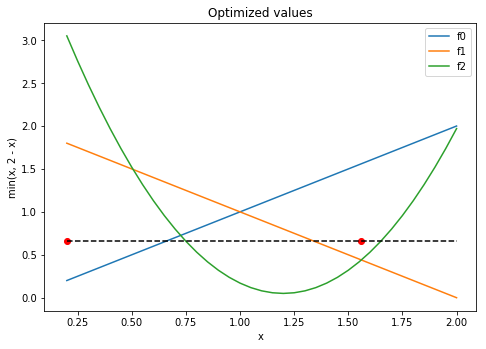

In [4]:
""" Plot the outputs
"""
x=np.arange(BOUNDS[0], BOUNDS[1] + 0.05, 0.05)
fig=plt.figure()
fig.clf()
ax=fig.add_axes([0, 0, 1, 1]) # create the figure in way that makes the notebook plot it
    
ax.set_title("Optimized values")
ax.set_xlabel("x")
ax.set_ylabel("min(x, 2 - x)")


# plot each of the functions
for f in FUNS:
    ax.plot(x, [f(i) for i in x])
    
ax.plot(x, [optimal_val for _ in x], 'k--')
    
# plot the optimal x values versus the optimal function value 
for loc in optimal_loc:
    ax.scatter([loc], [optimal_val], c='r')


# Make silly legends 
ax.legend(["f{}".format(str(i)) for i in range(len(FUNS))])

Text(0, 0.5, 'min(x, 2 - x)')

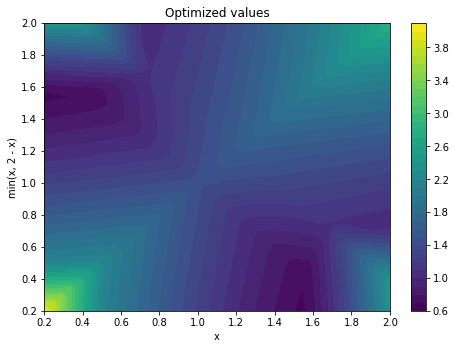

In [6]:
xlist = np.linspace(BOUNDS[0], BOUNDS[1], 40)
ylist = np.linspace(BOUNDS[0], BOUNDS[1], 40)
Z = np.zeros((40, 40))
X, Y = np.meshgrid(xlist, ylist)
for i, y in enumerate(ylist):
    for j, x in enumerate(xlist):
        Z[i, j] = specific_fun([x, y])
        
fig=plt.figure()
fig.clf()
ax=fig.add_axes([0, 0, 1, 1]) # create the figure in way that makes the notebook plot it
cp = ax.contourf(X, Y, Z, 40)
fig.colorbar(cp) # Add a colorbar to a plot
ax.set_title("Optimized values")
ax.set_xlabel("x")
ax.set_ylabel("min(x, 2 - x)")
